# Bab 1: Pendahuluan

## Latar Belakang

Sebagai salah satu penyedia layanan transportasi publik terkemuka di Jakarta, Transjakarta terus berupaya mengoptimalkan operasional dan meningkatkan kualitas layanan bagi para penumpangnya. Untuk mencapai tujuan ini, manajemen Transjakarta memerlukan pemahaman yang mendalam tentang berbagai aspek bisnis mereka, termasuk pola penggunaan alat pembayaran. Analisis data transaksi menjadi salah satu cara paling efektif untuk mendapatkan wawasan berharga yang dapat mendorong pengambilan keputusan strategis.

Sebagai seorang data analyst, saya diberi tugas untuk menganalisis data transaksi harian Transjakarta. Analisis ini diharapkan dapat memberikan gambaran yang jelas mengenai perilaku pembayaran penumpang, yang sangat penting untuk kemitraan dengan bank, program promosi, dan perencanaan keuangan.

## Pernyataan Masalah

Perusahaan ingin mengetahui bagaimana pola penggunaan kartu pembayaran yang berbeda memengaruhi volume transaksi dan pendapatan. Informasi ini akan membantu manajemen Transjakarta untuk:

1. Mengidentifikasi mitra bank atau penerbit kartu yang paling strategis.

2. Merancang strategi promosi yang ditargetkan untuk meningkatkan penggunaan alat pembayaran tertentu.

3. Mengalokasikan sumber daya dengan lebih efektif.

Sebagai seorang data analyst, kita akan mencoba menjawab pertanyaan utama berikut:

"Bagaimana karakteristik penggunaan kartu pembayaran, terutama dari segi frekuensi dan pendapatan, dibandingkan satu sama lain, dan apa insight bisnis yang bisa diambil dari perbandingan ini?"


# Bab 2: Data Understanding & Cleaning

Langkah pertama adalah memahami struktur data dan membersihkannya dari anomali untuk memastikan analisis yang akurat. Sebelum memulai analisis, kita harus memperdalam pemahaman kita tentang dataset dengan menyelesaikan tahap pemahaman data. Proses ini akan mengidentifikasi anomali apa pun dalam dataset yang memerlukan penyelesaian selama tahap pembersihan data. Setiap tahap penanganan anomali akan disertai dengan justifikasi atas langkah-langkah yang diambil, baik dari segi pengetahuan domain maupun analisis statistik.

## Data

Pertanyaan di bab 1 akan kita jawab dengan menganalisis data transaksi operasional harian Transjakarta yang sudah dikumpulkan perusahaan. Data set dapat diakses di sini : https://drive.google.com/drive/folders/1S04hk5uHfHYe6J1S6fVqDunuja1Lk1Lo


## Import Library

In [1]:
# Import library untuk manipulasi data (pandas) dan operasi numerik (numpy)
import pandas as pd
import numpy as np

# Import library untuk visualisasi data (matplotlib dan seaborn)
import matplotlib.pyplot as plt
import seaborn as sns

# Import library untuk uji statistik (scipy.stats)
from scipy.stats import ttest_ind

# Import library untuk mengabaikan pesan peringatan
import warnings
warnings.filterwarnings("ignore")

Data set ini berisi informasi terkait transaksi, perjalanan, dan data anonim dari kartu pembayaran yang digunakan oleh penumpang saat bertransaksi di Transjakarta. Data ini dikumpulkan untuk memahami pola perilaku pembayaran pelanggan dan mengoptimalkan layanan.
Ada 22 kolom di dalam dataset ini, yang dapat dikategorikan sebagai berikut:

1. Informasi Transaksi:
  
•	transID: ID unik untuk setiap transaksi.

•	payAmount: Jumlah uang yang dibayarkan untuk transaksi.

2.	Informasi Kartu Pembayaran:
  
•	payCardID: ID unik dari kartu yang digunakan.

•	payCardBank: Nama bank atau penerbit kartu.

•	payCardName: Nama pemilik kartu.

•	payCardSex: Jenis kelamin pemilik kartu.

•	payCardBirthDate: Tahun lahir pemilik kartu.

3.	Informasi Perjalanan:
  
•	corridorID: ID unik untuk setiap rute atau koridor bus.

•	corridorName: Nama rute atau koridor bus.

•	direction: Arah perjalanan bus.

•	tapInStops: ID halte masuk.

•	tapInStopsName: Nama halte masuk.

•	tapInStopsLat: Koordinat latitude halte masuk.

•	tapInStopsLon: Koordinat longitude halte masuk.

•	stopStartSeq: Nomor urut halte masuk dalam rute.

•	tapInTime: Tanggal dan waktu masuk ke dalam bus.

•	tapOutStops: ID halte keluar.

•	tapOutStopsName: Nama halte keluar.

•	tapOutStopsLat: Koordinat latitude halte keluar.

•	tapOutStopsLon: Koordinat longitude halte keluar.

•	stopEndSeq: Nomor urut halte keluar dalam rute.

•	tapOutTime: Tanggal dan waktu keluar dari bus.



## Memuat & Eksplorasi Data

Pertama, mari kita lihat informasi umum dari dataset Transjakarta.csv, termasuk 5 baris teratas dan terbawahnya :

In [2]:
# Memuat data dari file CSV ke dalam DataFrame dengan nama 'df'
df = pd.read_csv('Transjakarta.csv')

# Menampilkan 5 baris pertama data untuk melihat isi kolom dan format data
print("5 baris pertama:")
print(df.head())

# Menampilkan 5 baris terakhir data untuk melihat konsistensi data di bagian akhir
print("\n5 baris terakhir:")
print(df.tail())

5 baris pertama:
          transID         payCardID payCardBank      payCardName payCardSex  \
0  EIIW227B8L34VB   180062659848800      emoney   Bajragin Usada          M   
1  LGXO740D2N47GZ  4885331907664776         dki     Gandi Widodo          F   
2  DJWR385V2U57TO  4996225095064169         dki    Emong Wastuti          F   
3  JTUZ800U7C86EH      639099174703       flazz     Surya Wacana          F   
4  VMLO535V7F95NJ      570928206772       flazz  Embuh Mardhiyah          M   

   payCardBirthDate corridorID                              corridorName  \
0              2008          5                     Matraman Baru - Ancol   
1              1997         6C  Stasiun Tebet - Karet via Patra Kuningan   
2              1992        R1A                        Pantai Maju - Kota   
3              1978        11D       Pulo Gebang - Pulo Gadung 2 via PIK   
4              1982         12                     Tanjung Priok - Pluit   

   direction tapInStops  ... tapInStopsLon  stopSta

In [3]:
display(df.head(),df.tail())

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0


,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
37895,ZWEC949B8Q87QG,4685818286724028395,brizzi,Kamila Mahendra,F,2004,6B,Ragunan - MH Thamrin via Semanggi,1.0,P00261,...,106.82309,2,2023-04-21 18:18:37,P00228,SMK 57,-6.290967,106.82365,13.0,2023-04-21 19:55:49,3500.0
37896,YHHK837P6Y95GN,6502902290603767,dki,Titi Siregar,M,1974,9N,Pinang Ranti - Pramuka,1.0,P00064,...,106.88116,1,2023-04-18 21:52:31,P00179,Pinang Ranti,-6.291075,106.88634,2.0,2023-04-18 22:28:22,3500.0
37897,YXPP627N4G95HO,213159426675861,emoney,drg. Zahra Nashiruddin,F,1976,1T,Cibubur - Balai Kota,1.0,B02873P,...,106.81676,12,2023-04-04 10:29:47,B00226P,Buperta Cibubur,-6.370321,106.89628,14.0,2023-04-04 13:27:25,20000.0
37898,RGVK175U2U98UV,377840859133591,emoney,Ana Agustina,M,1976,JAK.13,Tanah Abang - Jembatan Lima,1.0,B02505P,...,106.80954,33,2023-04-15 19:59:26,B01787P,JPO Blok G,-6.188861,106.81135,34.0,2023-04-15 20:27:50,0.0
37899,FMZZ963S4B68ZP,501862539795,flazz,drg. Leo Najmudin,F,1985,13,Ciledug - Tendean,0.0,P00001,...,106.74786,2,2023-04-12 21:08:12,P00106,Kebayoran Lama,-6.238340,106.77752,7.0,2023-04-12 21:34:53,3500.0


In [4]:
# Menampilkan informasi ringkas DataFrame, seperti jumlah baris, kolom, tipe data, dan nilai non-null
print("\nInformasi DataFrame:")
print(df.info())


Informasi DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transID           37900 non-null  object 
 1   payCardID         37900 non-null  int64  
 2   payCardBank       37900 non-null  object 
 3   payCardName       37900 non-null  object 
 4   payCardSex        37900 non-null  object 
 5   payCardBirthDate  37900 non-null  int64  
 6   corridorID        36643 non-null  object 
 7   corridorName      35970 non-null  object 
 8   direction         37900 non-null  float64
 9   tapInStops        36687 non-null  object 
 10  tapInStopsName    37900 non-null  object 
 11  tapInStopsLat     37900 non-null  float64
 12  tapInStopsLon     37900 non-null  float64
 13  stopStartSeq      37900 non-null  int64  
 14  tapInTime         37900 non-null  object 
 15  tapOutStops       35611 non-null  object 
 16  tapOutStopsName   

In [5]:
df.describe()

,payCardID,payCardBirthDate,direction,tapInStopsLat,tapInStopsLon,stopStartSeq,tapOutStopsLat,tapOutStopsLon,stopEndSeq,payAmount
count,3.790000e+04,37900.000000,37900.000000,37900.000000,37900.000000,37900.000000,36556.000000,36556.000000,36556.000000,36893.000000
mean,4.250060e+17,1990.089314,0.500633,-6.214838,106.841554,13.572480,-6.214651,106.841233,21.219909,2699.712683
std,1.321699e+18,13.051482,0.500006,0.057911,0.060369,12.237623,0.059022,0.060999,13.800689,4212.225592
min,6.040368e+10,1946.000000,0.000000,-6.394973,106.614730,0.000000,-6.394973,106.614730,1.000000,0.000000
25%,1.800442e+14,1982.000000,0.000000,-6.245863,106.803470,4.000000,-6.247225,106.801750,11.000000,0.000000
50%,3.507947e+15,1990.000000,1.000000,-6.214587,106.834830,10.000000,-6.214718,106.834580,18.000000,3500.000000
75%,4.699023e+15,2001.000000,1.000000,-6.175528,106.882270,19.000000,-6.174736,106.883030,29.000000,3500.000000
max,4.997694e+18,2012.000000,1.000000,-6.089429,107.023950,68.000000,-6.091746,107.023660,77.000000,20000.000000


In [6]:
df.isnull().sum()

transID                0
payCardID              0
payCardBank            0
payCardName            0
payCardSex             0
payCardBirthDate       0
corridorID          1257
corridorName        1930
direction              0
tapInStops          1213
tapInStopsName         0
tapInStopsLat          0
tapInStopsLon          0
stopStartSeq           0
tapInTime              0
tapOutStops         2289
tapOutStopsName     1344
tapOutStopsLat      1344
tapOutStopsLon      1344
stopEndSeq          1344
tapOutTime          1344
payAmount           1007
dtype: int64

Dataset ini terdiri dari 37.900 baris data transaksi

Temuan Utama dan Implikasi Bisnis

1. Anomali Pendapatan (payAmount): Ini adalah masalah paling signifikan dalam dataset. Nilai transaksi maksimum (max) mencapai 20.000, yang sangat jauh di atas rata-rata (mean) 2.699,7 dan 75% transaksi lainnya yang berada di bawah 3.500. Nilai ekstrem ini adalah outlier yang perlu diwaspadai. Keberadaannya dapat mengacaukan analisis total pendapatan dan rata-rata per transaksi, sehingga hasilnya tidak akurat. Selain itu, jumlah baris (count) pada kolom ini hanya 36.893, yang berarti ada 1.007 transaksi yang memiliki nilai pendapatan kosong, hal inii perlu ditangani.

2. Identitas dan Usia Kartu (payCardId & payCardBirthDate): Tidak ada data yang hilang di kedua kolom ini, yang sangat baik untuk analisis. Namun, kolom payCardBirthDate yang saat ini berformat numerik perlu diubah ke tipe data datetime. Langkah ini penting untuk menganalisis pola penggunaan berdasarkan usia kartu atau tren dari waktu ke waktu.

3. Data Perjalanan: Kolom-kolom seperti tapInStopsLat, tapInStopsLon, dan direction terlihat wajar dan konsisten dengan data perjalanan. Karena fokus utama analisis ini adalah frekuensi dan pendapatan, kolom-kolom ini tidak perlu diprioritaskan untuk pembersihan mendalam.

## Menangani Anomali pada Kolom payAmount

A. Mengisi Nilai Kosong

Karena kolom payAmount memiliki outlier, kita akan menggunakan median untuk mengisi nilai yang kosong. Median adalah pilihan terbaik karena tidak terpengaruh oleh nilai ekstrem.

In [7]:
# Hitung nilai median dari kolom 'payAmount'
median_payamount = df['payAmount'].median()
median_payamount

3500.0

In [8]:
# Isi nilai kosong (NaN) dengan median
df['payAmount'] = df['payAmount'].fillna(median_payamount)
df['payAmount']

0         3500.0
1         3500.0
2         3500.0
3         3500.0
4         3500.0
          ...   
37895     3500.0
37896     3500.0
37897    20000.0
37898        0.0
37899     3500.0
Name: payAmount, Length: 37900, dtype: float64

In [9]:
# Cek kembali jumlah nilai non-kosong untuk konfirmasi
print(df['payAmount'].count())

37900


B. Menangani Outlier

Kita akan menggunakan metode Interquartile Range (IQR) untuk mengidentifikasi dan menangani outlier. Caranya adalah dengan "membatasi" nilai ekstrem agar tidak terlalu jauh dari mayoritas data.

In [10]:
# Hitung kuartil pertama (Q1) dan kuartil ketiga (Q3)
Q1 = df['payAmount'].quantile(0.25)
Q3 = df['payAmount'].quantile(0.75)
IQR = Q3 - Q1
IQR

np.float64(3500.0)

In [11]:
# Tentukan batas atas dan bawah untuk outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [12]:
lower_bound

np.float64(-5250.0)

In [13]:
upper_bound

np.float64(8750.0)

In [14]:
# Cek beberapa data outlier yang akan ditangani
print(f"Batas Bawah: {lower_bound}")
print(f"Batas Atas: {upper_bound}")
print(f"Jumlah outlier di atas batas atas: {len(df[df['payAmount'] > upper_bound])}")

Batas Bawah: -5250.0
Batas Atas: 8750.0
Jumlah outlier di atas batas atas: 1742


In [15]:
# Tangani outlier dengan 'capping' (membatasi nilai)
df['payAmount'] = df['payAmount'].apply(lambda x: upper_bound if x > upper_bound else x)
df['payAmount'] = df['payAmount'].apply(lambda x: lower_bound if x < lower_bound else x)

In [16]:
df['payAmount']

0        3500.0
1        3500.0
2        3500.0
3        3500.0
4        3500.0
          ...  
37895    3500.0
37896    3500.0
37897    8750.0
37898       0.0
37899    3500.0
Name: payAmount, Length: 37900, dtype: float64

## Mengubah Tipe Data Kolom payCardBirthDate

In [17]:
# Ubah kolom 'payCardBirthDate' ke format datetime
df['payCardBirthDate'] = pd.to_datetime(df['payCardBirthDate'], format='%Y')
df['payCardBirthDate'] 

0       2008-01-01
1       1997-01-01
2       1992-01-01
3       1978-01-01
4       1982-01-01
           ...    
37895   2004-01-01
37896   1974-01-01
37897   1976-01-01
37898   1976-01-01
37899   1985-01-01
Name: payCardBirthDate, Length: 37900, dtype: datetime64[ns]

In [32]:
# Cek tipe data setelah diubah
print(df['payCardBirthDate'].dtype)

datetime64[ns]


##  Tangani Data Duplikat

In [19]:
# Cek dan hapus duplikat pada seluruh baris
df_clean = df.drop_duplicates(keep='first')
df_clean

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008-01-01,5,Matraman Baru - Ancol,1.0,P00142,...,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997-01-01,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992-01-01,R1A,Pantai Maju - Kota,0.0,B00499P,...,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978-01-01,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982-01-01,12,Tanjung Priok - Pluit,0.0,P00239,...,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37895,ZWEC949B8Q87QG,4685818286724028395,brizzi,Kamila Mahendra,F,2004-01-01,6B,Ragunan - MH Thamrin via Semanggi,1.0,P00261,...,106.82309,2,2023-04-21 18:18:37,P00228,SMK 57,-6.290967,106.82365,13.0,2023-04-21 19:55:49,3500.0
37896,YHHK837P6Y95GN,6502902290603767,dki,Titi Siregar,M,1974-01-01,9N,Pinang Ranti - Pramuka,1.0,P00064,...,106.88116,1,2023-04-18 21:52:31,P00179,Pinang Ranti,-6.291075,106.88634,2.0,2023-04-18 22:28:22,3500.0
37897,YXPP627N4G95HO,213159426675861,emoney,drg. Zahra Nashiruddin,F,1976-01-01,1T,Cibubur - Balai Kota,1.0,B02873P,...,106.81676,12,2023-04-04 10:29:47,B00226P,Buperta Cibubur,-6.370321,106.89628,14.0,2023-04-04 13:27:25,8750.0
37898,RGVK175U2U98UV,377840859133591,emoney,Ana Agustina,M,1976-01-01,JAK.13,Tanah Abang - Jembatan Lima,1.0,B02505P,...,106.80954,33,2023-04-15 19:59:26,B01787P,JPO Blok G,-6.188861,106.81135,34.0,2023-04-15 20:27:50,0.0


In [20]:
# Tampilkan jumlah baris sebelum dan sesudah penghapusan
print(f"Jumlah baris sebelum dihapus duplikat: {df.shape[0]}")
print(f"Jumlah baris setelah dihapus duplikat: {df_clean.shape[0]}")

Jumlah baris sebelum dihapus duplikat: 37900
Jumlah baris setelah dihapus duplikat: 37900


## Ekstrak nama hari dan jam dari kolom 'tapInTime' untuk analisis tambahan

In [33]:
# Ekstrak nama hari dan jam dari kolom 'tapInTime' untuk analisis tambahan
# Langkah 1: Ubah kolom 'tapInTime' ke format datetime
df['tapInTime'] = pd.to_datetime(df['tapInTime'])

# Langkah 2: Mengekstrak jamnya
df['hour'] = df['tapInTime'].dt.hour
df['day'] = df['tapInTime'].dt.day_name()


# Bab 3: Analisis & Visualisasi

## Analisis Deskriptif

Kita akan menghitung total transaksi dan pendapatan per bank untuk mendapatkan gambaran umum.

In [22]:
# Mengelompokkan data berdasarkan 'payCardBank'
bank_analysis = df.groupby('payCardBank').agg(
    # Menghitung jumlah transaksi (menggunakan count)
    total_transactions=('transID', 'count'),
    # Menghitung total pendapatan (menggunakan sum)
    total_revenue=('payAmount', 'sum')
).reset_index()

In [23]:
# Mengurutkan hasilnya berdasarkan total transaksi dari yang tertinggi
bank_analysis_sorted = bank_analysis.sort_values(by='total_transactions', ascending=False)

print("Analisis Pola Penggunaan Berdasarkan Bank:")
print(bank_analysis_sorted)

Analisis Pola Penggunaan Berdasarkan Bank:
  payCardBank  total_transactions  total_revenue
2         dki               18743     38374000.0
3      emoney                6866     16367750.0
1      brizzi                3531      9087750.0
4       flazz                3234      7973000.0
5      online                2869      5923750.0
0         bni                2657      5801250.0


## Uji Hipotesis

Setelah melihat pola dari analisis deskriptif, kita akan memvalidasi temuan dengan uji statistik.

In [24]:
# Mengambil data 'payAmount' untuk dua bank dengan jumlah transaksi tertinggi
pay_dki = df[df['payCardBank'] == 'dki']['payAmount']
pay_emoney = df[df['payCardBank'] == 'emoney']['payAmount']

In [25]:
# Melakukan t-test untuk membandingkan rata-rata dua kelompok
t_stat, p_value = ttest_ind(pay_dki, pay_emoney, equal_var=False)

In [26]:
# Interpretasi hasilnya
alpha = 0.05
print("\nHasil Uji Hipotesis:")
print(f"t-statistic: {t_stat}")
print(f"p-value: {p_value}")

if p_value < alpha:
    print("\nKarena p-value kurang dari 0.05, kita menolak hipotesis nol.")
    print("Kesimpulan: Terdapat perbedaan signifikan secara statistik antara rata-rata pendapatan per transaksi Bank DKI dan E-Money.")
else:
    print("\nKarena p-value lebih dari 0.05, kita gagal menolak hipotesis nol.")
    print("Kesimpulan: Tidak ada perbedaan signifikan secara statistik antara rata-rata pendapatan per transaksi Bank DKI dan E-Money.")


Hasil Uji Hipotesis:
t-statistic: -10.434413807971724
p-value: 2.242480491419306e-25

Karena p-value kurang dari 0.05, kita menolak hipotesis nol.
Kesimpulan: Terdapat perbedaan signifikan secara statistik antara rata-rata pendapatan per transaksi Bank DKI dan E-Money.


## Visualisasi Hasil Analisis

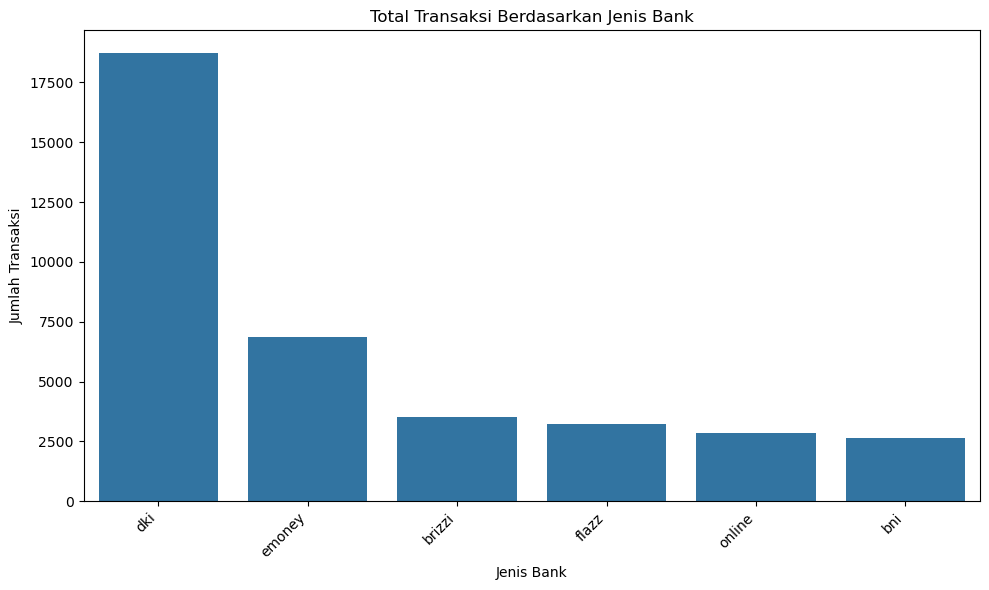

In [27]:
# Bar chart untuk total transaksi per bank
plt.figure(figsize=(10, 6))
sns.barplot(x='payCardBank', y='total_transactions', data=bank_analysis_sorted)
plt.title('Total Transaksi Berdasarkan Jenis Bank')
plt.xlabel('Jenis Bank')
plt.ylabel('Jumlah Transaksi')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

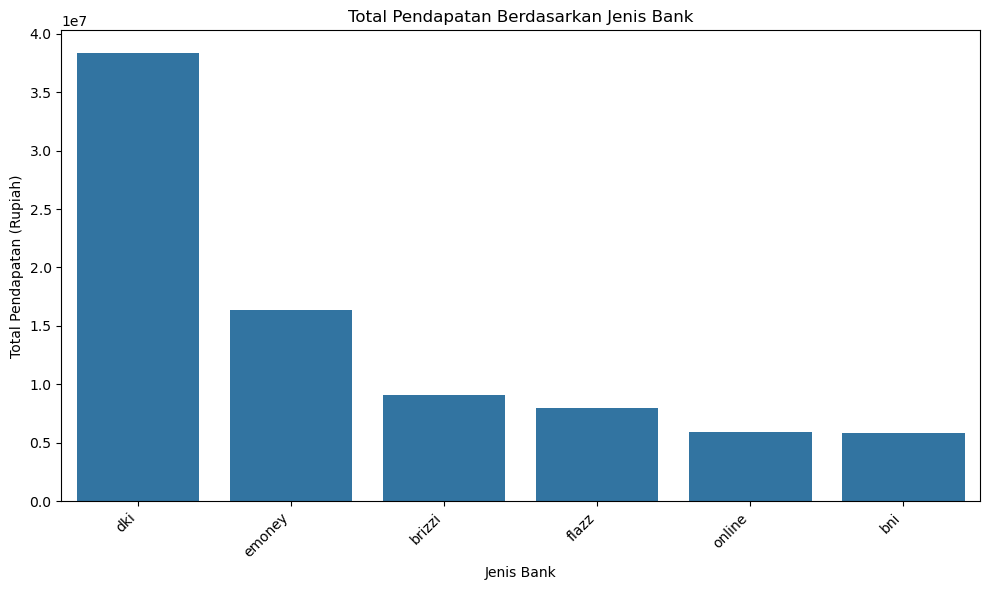

In [28]:
# Bar chart untuk total pendapatan per bank
plt.figure(figsize=(10, 6))
sns.barplot(x='payCardBank', y='total_revenue', data=bank_analysis_sorted)
plt.title('Total Pendapatan Berdasarkan Jenis Bank')
plt.xlabel('Jenis Bank')
plt.ylabel('Total Pendapatan (Rupiah)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [29]:
# Pola Transaksi berdasarkan Jam
# Menghitung jumlah transaksi per jam
transactions_by_hour = df['hour'].value_counts().sort_index()

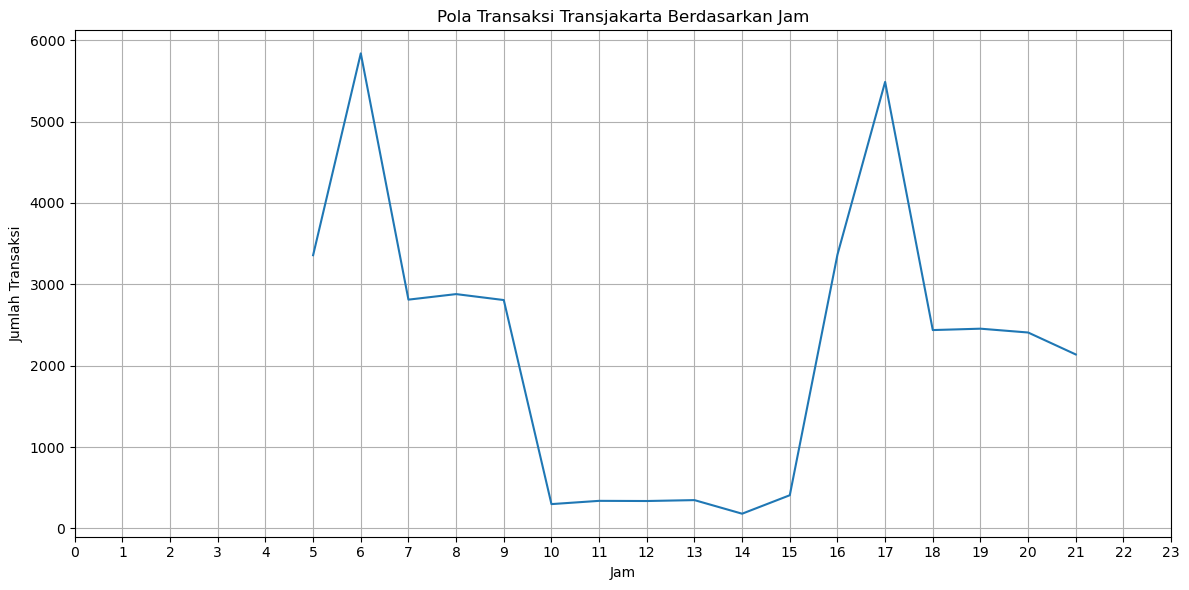

In [30]:
# Membuat line plot
plt.figure(figsize=(12, 6))
sns.lineplot(x=transactions_by_hour.index, y=transactions_by_hour.values)
plt.title('Pola Transaksi Transjakarta Berdasarkan Jam')
plt.xlabel('Jam')
plt.ylabel('Jumlah Transaksi')
plt.xticks(np.arange(0, 24, step=1))
plt.grid(True)
plt.tight_layout()
plt.show()

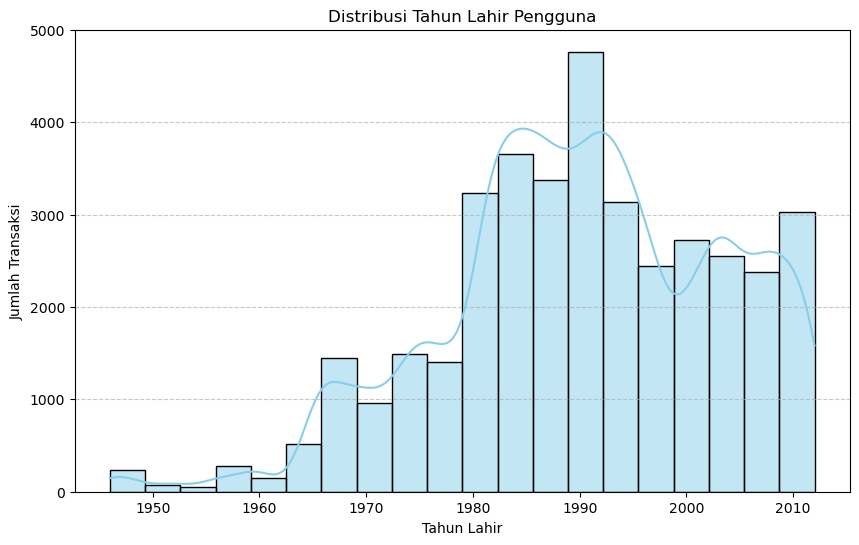

In [35]:
# Distribusi Tahun Lahir Pengguna
plt.figure(figsize=(10, 6))
sns.histplot(data=df_clean, x='payCardBirthDate', bins=20, kde=True, color='skyblue')
plt.title('Distribusi Tahun Lahir Pengguna')
plt.xlabel('Tahun Lahir')
plt.ylabel('Jumlah Transaksi')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Bab 4: Kesimpulan & Rekomendasi

Kesimpulan

Berdasarkan analisis data transaksi Transjakarta yang telah dilakukan, ditemukan beberapa karakteristik kunci terkait penggunaan kartu pembayaran:

1. Dominasi Pembayaran: Kartu pembayaran Bank DKI adalah yang paling dominan, baik dari segi jumlah transaksi maupun total pendapatan. Ini menunjukkan bahwa Bank DKI merupakan mitra strategis utama dengan basis pengguna terluas di kalangan penumpang Transjakarta.

2. Pola Pendapatan Berbeda: Hasil uji hipotesis menunjukkan adanya perbedaan signifikan secara statistik pada rata-rata pendapatan per transaksi antara Bank DKI dan E-Money. Hal ini mengindikasikan adanya perbedaan perilaku pengeluaran di antara pengguna kedua jenis kartu tersebut.

3. Pola Penggunaan Harian: Transaksi harian menunjukkan pola yang sangat konsisten dengan jam sibuk (pagi dan sore). Pola ini bisa menjadi dasar yang kuat untuk perencanaan operasional dan pemasaran.

Rekomendasi

Untuk mengoptimalkan operasional dan meningkatkan pendapatan, berikut adalah beberapa rekomendasi strategis yang dapat dipertimbangkan oleh manajemen Transjakarta:

1. Perkuat Kemitraan dengan Bank DKI: Berikan insentif khusus untuk pengguna kartu Bank DKI melalui program loyalitas atau promosi bersama. Strategi ini akan membantu mempertahankan basis pengguna terbesar dan dapat meningkatkan pendapatan secara lebih lanjut. 

2. Kembangkan Strategi Promosi yang Bertarget: Lakukan kampanye promosi yang ditargetkan untuk kartu dengan pangsa pasar yang lebih kecil, seperti Flazz atau Brizzi, untuk mendorong diversifikasi alat pembayaran. Promosi ini bisa difokuskan pada waktu-waktu tertentu, misalnya di luar jam sibuk, untuk menyeimbangkan pola penggunaan. 

3. Optimalkan Operasional Berdasarkan Jam Sibuk: Gunakan data pola transaksi harian untuk mengatur jadwal dan ketersediaan armada bus. Penambahan bus pada jam-jam puncak (pagi dan sore) dapat mengurangi antrean dan meningkatkan kepuasan penumpang. 

In [31]:
df_clean.to_csv('transjakarta_data_bersih.csv', index=False)